<a href="https://colab.research.google.com/github/athirarama/rama/blob/master/SVM%26NN(Srinivasa_DataSets).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
!pip install seaborn

In [3]:
letters = pd.read_excel("/content/letterdata (1).xlsx")
letters

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar
0,T,2,8,3,5,1,8,13.0,0.0,6.0
1,I,5,12,3,7,2,10,5.0,5.0,4.0
2,D,4,11,6,8,6,10,6.0,2.0,6.0
3,N,7,11,6,6,3,5,9.0,4.0,6.0
4,G,2,1,3,1,1,8,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...
40847,6,6,4,2,8,3,7,NaN,NaN,NaN
40848,12,9,13,2,9,3,7,NaN,NaN,NaN
40849,11,9,5,2,12,2,4,NaN,NaN,NaN
40850,10,6,8,1,9,5,8,NaN,NaN,NaN


In [4]:
# about the dataset

# dimensions
print("Dimensions: ", letters.shape, "\n")

# data types
print(letters.info())

# head
letters.head()

Dimensions:  (40852, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40852 entries, 0 to 40851
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   letter  40001 non-null  object 
 1   xbox    40001 non-null  object 
 2   ybox    40001 non-null  object 
 3   width   40001 non-null  object 
 4   height  40001 non-null  object 
 5   onpix   40001 non-null  object 
 6   xbar    40001 non-null  object 
 7   ybar    20000 non-null  float64
 8   x2bar   20000 non-null  float64
 9   y2bar   20000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 3.1+ MB
None


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar
0,T,2,8,3,5,1,8,13.0,0.0,6.0
1,I,5,12,3,7,2,10,5.0,5.0,4.0
2,D,4,11,6,8,6,10,6.0,2.0,6.0
3,N,7,11,6,6,3,5,9.0,4.0,6.0
4,G,2,1,3,1,1,8,6.0,6.0,6.0


In [5]:
# a quirky bug: the column names have a space, e.g. 'xbox ', which throws and error when indexed
print(letters.columns)

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar'],
      dtype='object')


In [6]:
print(letters.shape)

(40852, 10)


In [7]:
# let's 'reindex' the column names
print(len(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']))

17


In [8]:
!pip install seaborn

In [9]:
letters['letter'].value_counts()

7        5578
6        2751
10       2563
9        1971
11       1799
8        1668
12       1043
5         819
U         813
D         805
P         803
T         796
M         792
A         789
X         787
Y         786
N         783
Q         783
F         775
G         773
13        772
E         768
B         766
V         764
L         761
R         758
I         755
O         753
W         752
S         748
J         747
K         739
C         736
Z         734
H         734
14        279
4         267
0         145
2          97
15         96
3          90
1          62
xybar       1
Name: letter, dtype: int64

In [10]:
letters.isnull().sum()

letter      851
xbox        851
ybox        851
width       851
height      851
onpix       851
xbar        851
ybar      20852
x2bar     20852
y2bar     20852
dtype: int64

In [11]:
X = np.array(letters)[:, 1:16] # row:column
y = np.array(letters.letter)[:]

In [12]:
X

array([[2, 8, 3, ..., 13.0, 0.0, 6.0],
       [5, 12, 3, ..., 5.0, 5.0, 4.0],
       [4, 11, 6, ..., 6.0, 2.0, 6.0],
       ...,
       [9, 5, 2, ..., nan, nan, nan],
       [6, 8, 1, ..., nan, nan, nan],
       [1, 8, 2, ..., nan, nan, nan]], dtype=object)

In [13]:
y

array(['T', 'I', 'D', ..., 11, 10, 8], dtype=object)

In [14]:
X_train = X[:16000, :] # select first 16000 rows, all columns
X_test = X[16001:, :] # select next 4000 rows, all columns
y_train = y[:16000]
y_test = y[16001:]

In [15]:
from sklearn import svm # Support Vector Machine

clf = svm.SVC(gamma=0.025, C=3) # clf=classifier

In [16]:
!pip install pandas

In [17]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

In [18]:
print(X_train_df.isnull().sum())
print(y_train_df.isnull().sum())

0    333
1    333
2    333
3    333
4    333
5    333
6    333
7    333
8    333
dtype: int64
0    333
dtype: int64


In [19]:
import string
label = list(string.ascii_uppercase[0:26]) # Create 26 uppercase letters from A to Z
predicted_lab = ["Predicted " + s for s in label]

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
train,test = train_test_split(letters,test_size = 0.3, random_state=1)
test.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar
26834,8,11,9,1,10,1,8,NaN,NaN,NaN
33940,7,6,8,0,8,2,8,NaN,NaN,NaN
38515,10,4,5,3,8,3,8,NaN,NaN,NaN
7943,G,4,7,5,5,4,6,6.0,6.0,5.0
21496,12,1,8,0,8,0,8,NaN,NaN,NaN


In [21]:
train_X = train.iloc[:,1:]
train_y = train.iloc[:,0]
test_X  = test.iloc[:,1:]
test_y  = test.iloc[:,0]


In [22]:
print(train_y.head())

9182     Q
16761    X
39378    7
40031    7
17761    K
Name: letter, dtype: object


In [23]:
letter_means = letters.groupby('letter').mean()
letter_means.head()

<ipython-input-23-6358460342f3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  letter_means = letters.groupby('letter').mean()


,ybar,x2bar,y2bar
letter,,,
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


<Axes: ylabel='letter'>

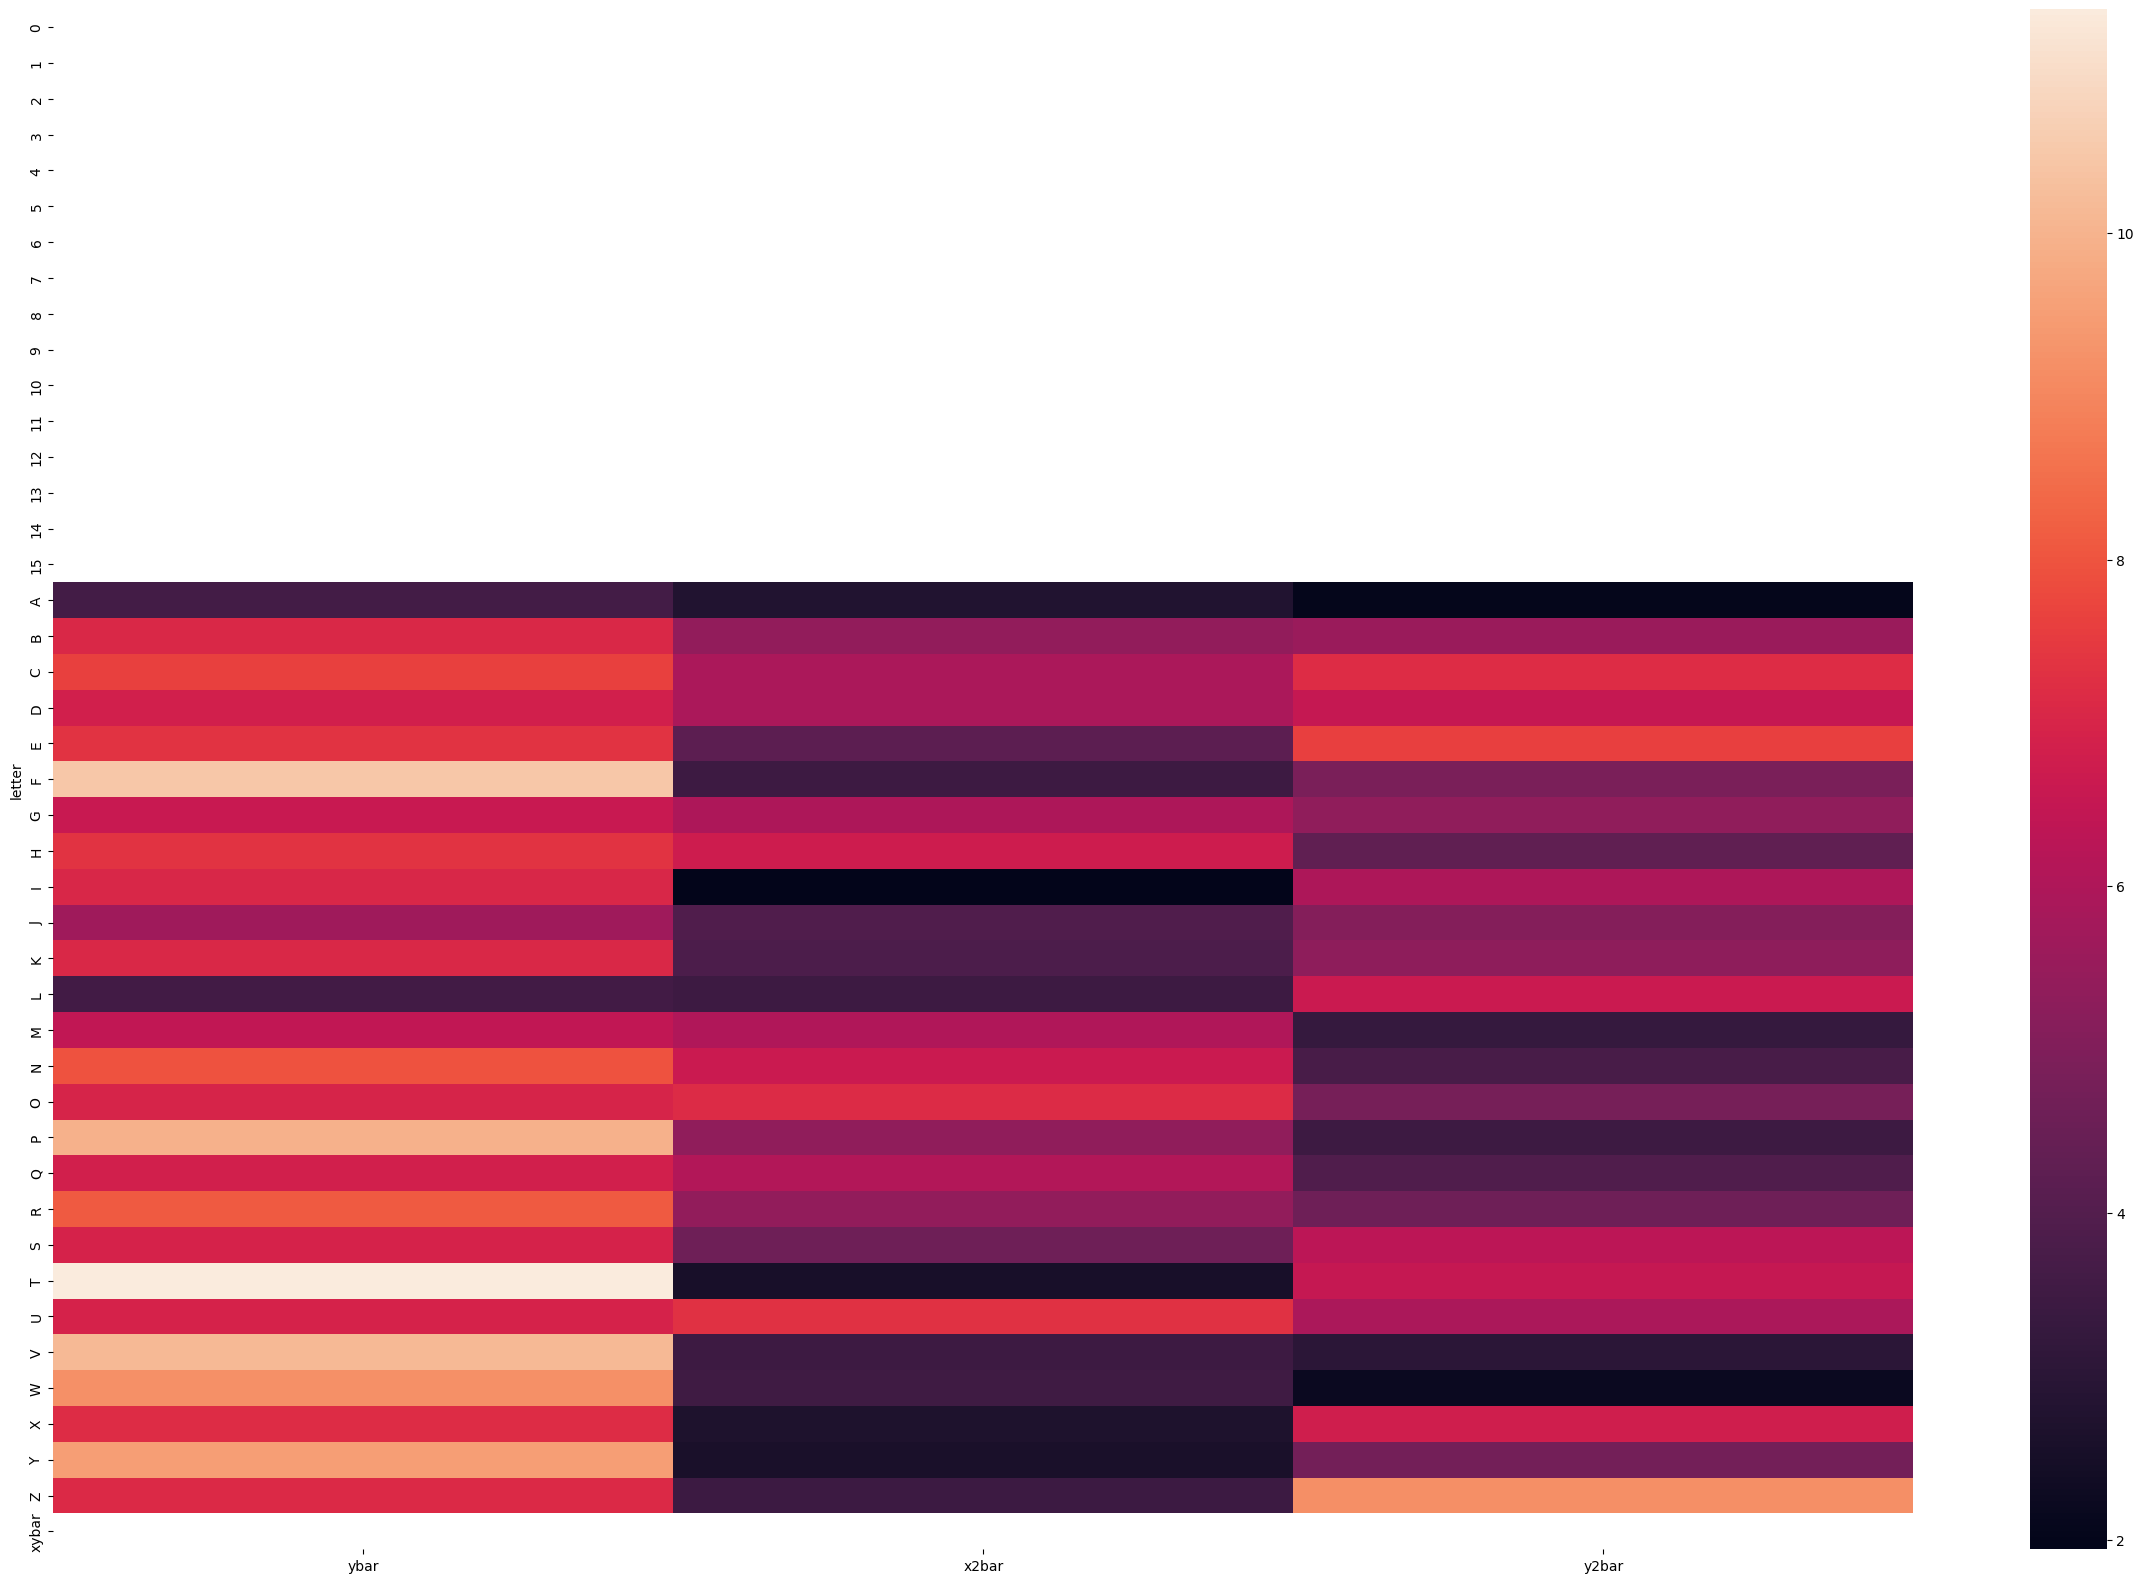

In [24]:
plt.figure(figsize=(30, 20))
sns.heatmap(letter_means)

In [25]:
# average feature values
round(letters.drop('letter', axis=1).mean(), 2)

<ipython-input-25-728f8de5409e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(letters.drop('letter', axis=1).mean(), 2)


ybar     7.50
x2bar    4.63
y2bar    5.18
dtype: float64

In [26]:
# splitting into X and y
X = letters.drop("letter", axis = 1)
y = letters['letter']


In [27]:
import pandas as pd

# Convert X_train to a Pandas DataFrame
df_X_train = pd.DataFrame(X_train)

# Check for missing values
missing_values = df_X_train.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

0    333
1    333
2    333
3    333
4    333
5    333
6    333
7    333
8    333
dtype: int64


In [28]:
## Reading the data
data=pd.read_csv("/content/concrete (2) (1).csv")


# Viewing the head of data read
data.head()

,cement,slag,Unnamed: 2,ash,Unnamed: 4,water,superplasticcoarseagg fineagg,Unnamed: 7,Unnamed: 8,age,Unnamed: 10,strength
0,141.3,NaN,212.0,NaN,0.0,203.5,0.0,971.8,748.5,NaN,28.0,29.89
1,168.9,NaN,42.2,NaN,124.3,158.3,10.8,1080.8,796.2,NaN,14.0,23.51
2,250.0,NaN,0.0,NaN,95.7,187.4,5.5,956.9,861.2,NaN,28.0,29.22
3,266.0,NaN,114.0,NaN,0.0,228.0,0.0,932.0,670.0,NaN,28.0,45.85
4,154.8,NaN,183.4,NaN,0.0,193.3,9.1,1047.4,696.7,NaN,28.0,18.29


In [29]:
#To get some info abt the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   slag                           984 non-null    float64
 2   Unnamed: 2                     1030 non-null   float64
 3   ash                            984 non-null    float64
 4   Unnamed: 4                     1030 non-null   float64
 5   water                          1030 non-null   float64
 6   superplasticcoarseagg fineagg  1030 non-null   float64
 7   Unnamed: 7                     1030 non-null   float64
 8   Unnamed: 8                     1030 non-null   float64
 9   age                            0 non-null      float64
 10  Unnamed: 10                    46 non-null     float64
 11  strength                       46 non-null     float64
dtypes: float64(12)
memory usage: 96.7 KB


In [30]:
# Data type of each dimensions
data.dtypes

cement                           float64
slag                             float64
Unnamed: 2                       float64
ash                              float64
Unnamed: 4                       float64
water                            float64
superplasticcoarseagg fineagg    float64
Unnamed: 7                       float64
Unnamed: 8                       float64
age                              float64
Unnamed: 10                      float64
strength                         float64
dtype: object

In [31]:
# Verifying whether there are missing values
data.isnull().sum()

cement                              0
slag                               46
Unnamed: 2                          0
ash                                46
Unnamed: 4                          0
water                               0
superplasticcoarseagg fineagg       0
Unnamed: 7                          0
Unnamed: 8                          0
age                              1030
Unnamed: 10                       984
strength                          984
dtype: int64

In [32]:
# Shape of the provided data
data.shape

(1030, 12)

In [33]:
# To describe the data- Five point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.3750,272.900,350.0000,540.0
slag,984.0,73.357419,85.984918,0.00,0.0000,22.000,142.5750,359.4
Unnamed: 2,1030.0,55.721650,65.768538,0.00,0.0000,0.000,118.3000,342.1
ash,984.0,181.469411,21.299276,121.80,164.9000,185.000,192.0000,247.0
Unnamed: 4,1030.0,8.252816,17.488503,0.00,0.0000,6.400,10.4000,195.0
water,1030.0,937.370777,180.178604,127.00,923.0500,967.000,1028.4000,1145.0
superplasticcoarseagg fineagg,1030.0,739.439126,177.089990,0.00,712.2000,776.950,821.3000,992.6
Unnamed: 7,1030.0,87.950485,203.326246,1.00,14.0000,28.000,56.0000,1090.0
Unnamed: 8,1030.0,68.735893,153.476578,2.33,24.1575,35.915,49.2375,945.0
age,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-34-1974bad3a5e5>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cement'],color='red')
<ipython-input-34-1974bad3a5e5>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['slag'],color='blue')
<ipython-input-34-1974bad3a5e5>:18: UserWarning: 

`distplot` is a deprecated 

<Axes: title={'center': 'ash'}, ylabel='ash'>

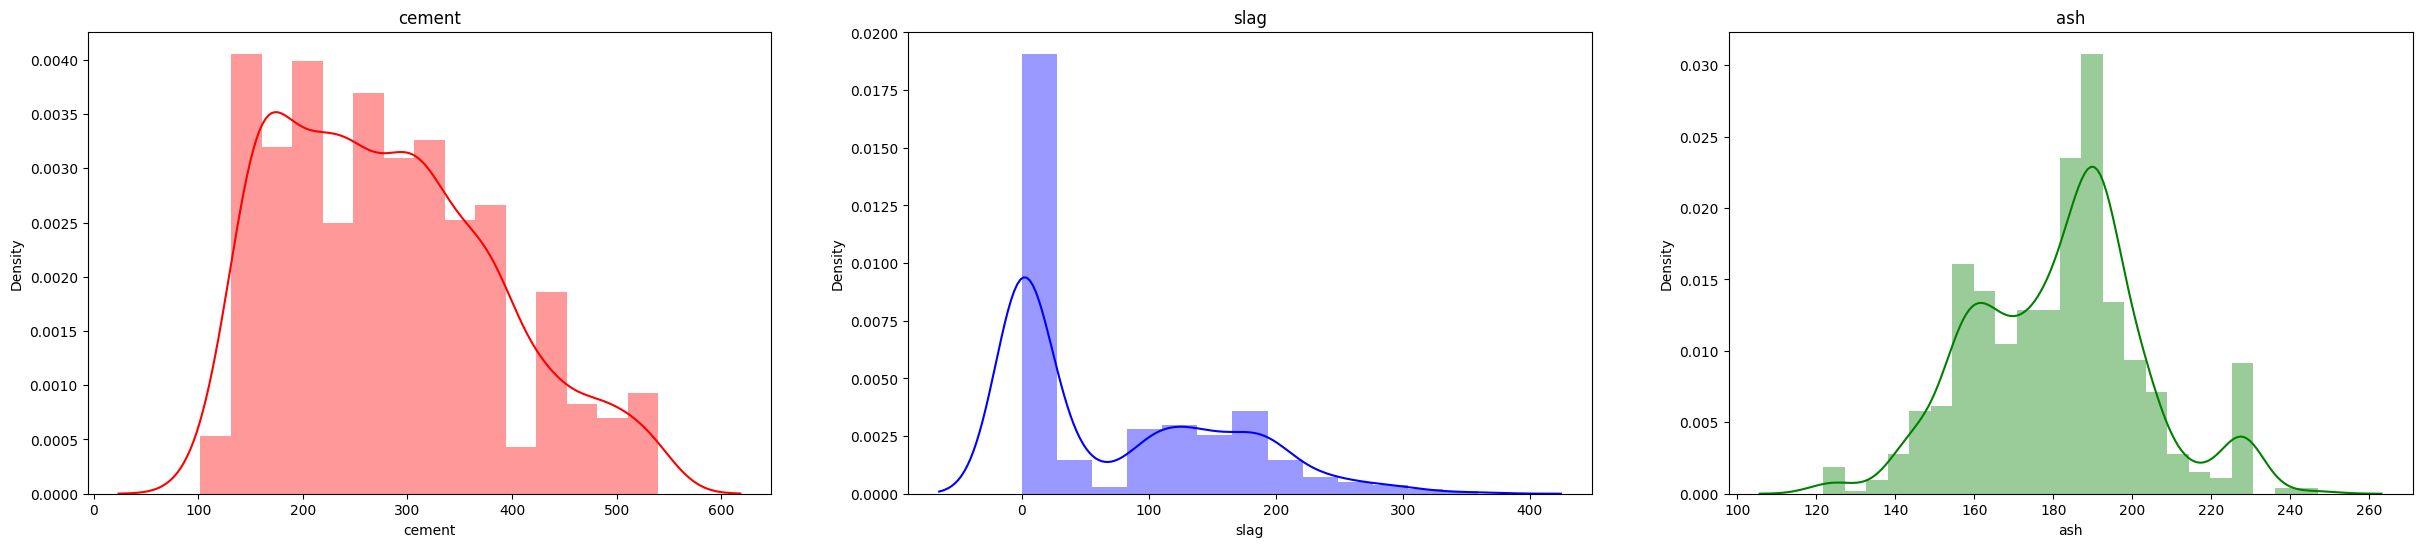

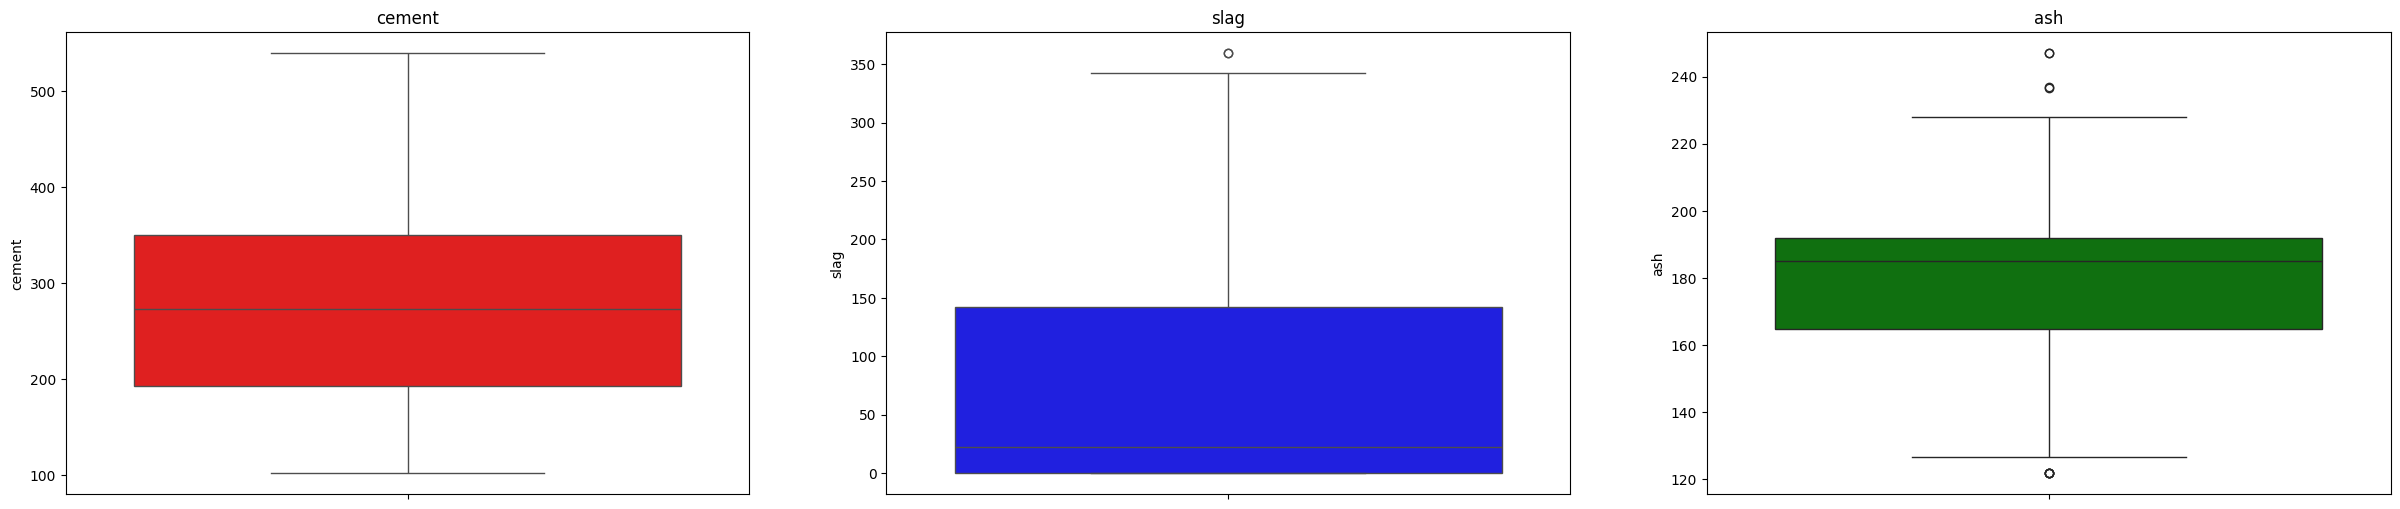

In [34]:
#Distribution of continous data

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('cement')
sns.distplot(data['cement'],color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('slag')
sns.distplot(data['slag'],color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('ash')
sns.distplot(data['ash'],color='green')


plt.figure(figsize=(30,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('cement')
sns.boxplot(data['cement'],orient='horizondal',color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('slag')
sns.boxplot(data['slag'],orient='horizondal',color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('ash')
sns.boxplot(data['ash'],orient='horizondal',color='green')

<Axes: title={'center': 'ash'}>

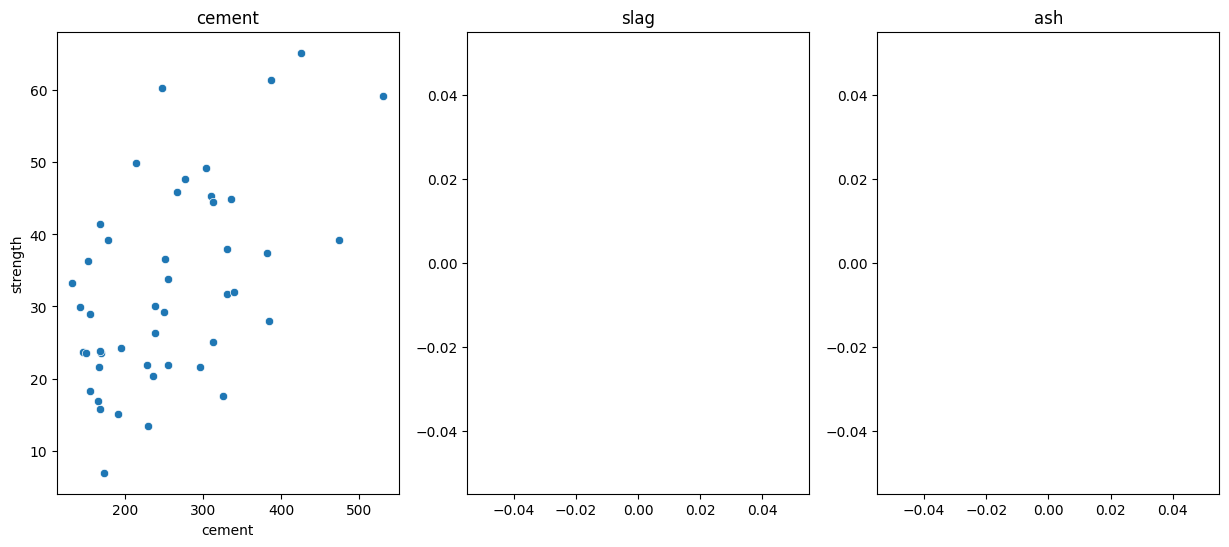

In [36]:
plt.figure(figsize=(15,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('cement')
sns.scatterplot(x="cement", y="strength", data=data)

#Subplot 2
plt.subplot(1,3,2)
plt.title('slag')
sns.scatterplot(x="slag", y="strength", data=data)

#Subplot 3
plt.subplot(1,3,3)
plt.title('ash')
sns.scatterplot(x="ash", y="strength", data=data)

<Axes: title={'center': 'Strength vs Age'}>

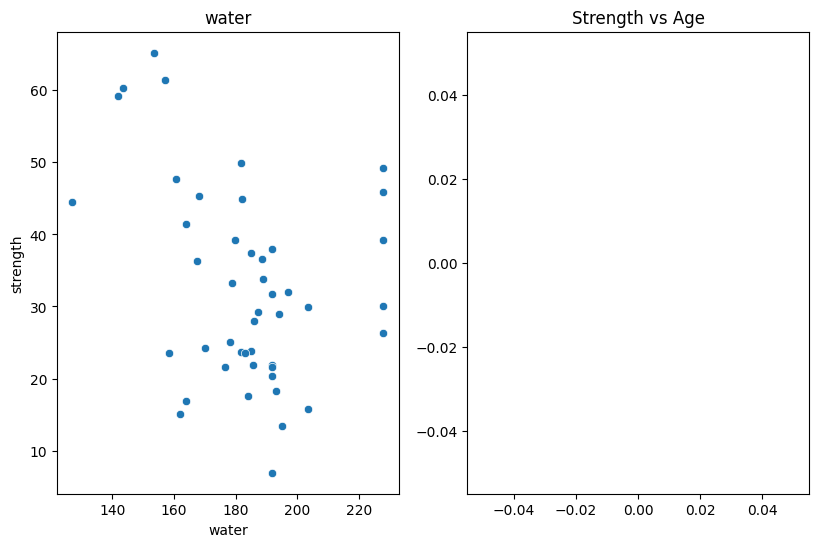

In [41]:
plt.figure(figsize=(15,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('water')
sns.scatterplot(x="water", y="strength", data=data)

#Subplot 2
plt.subplot(1,3,2)
plt.title('Strength vs Age')
sns.scatterplot(x="age", y="strength", data=data)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

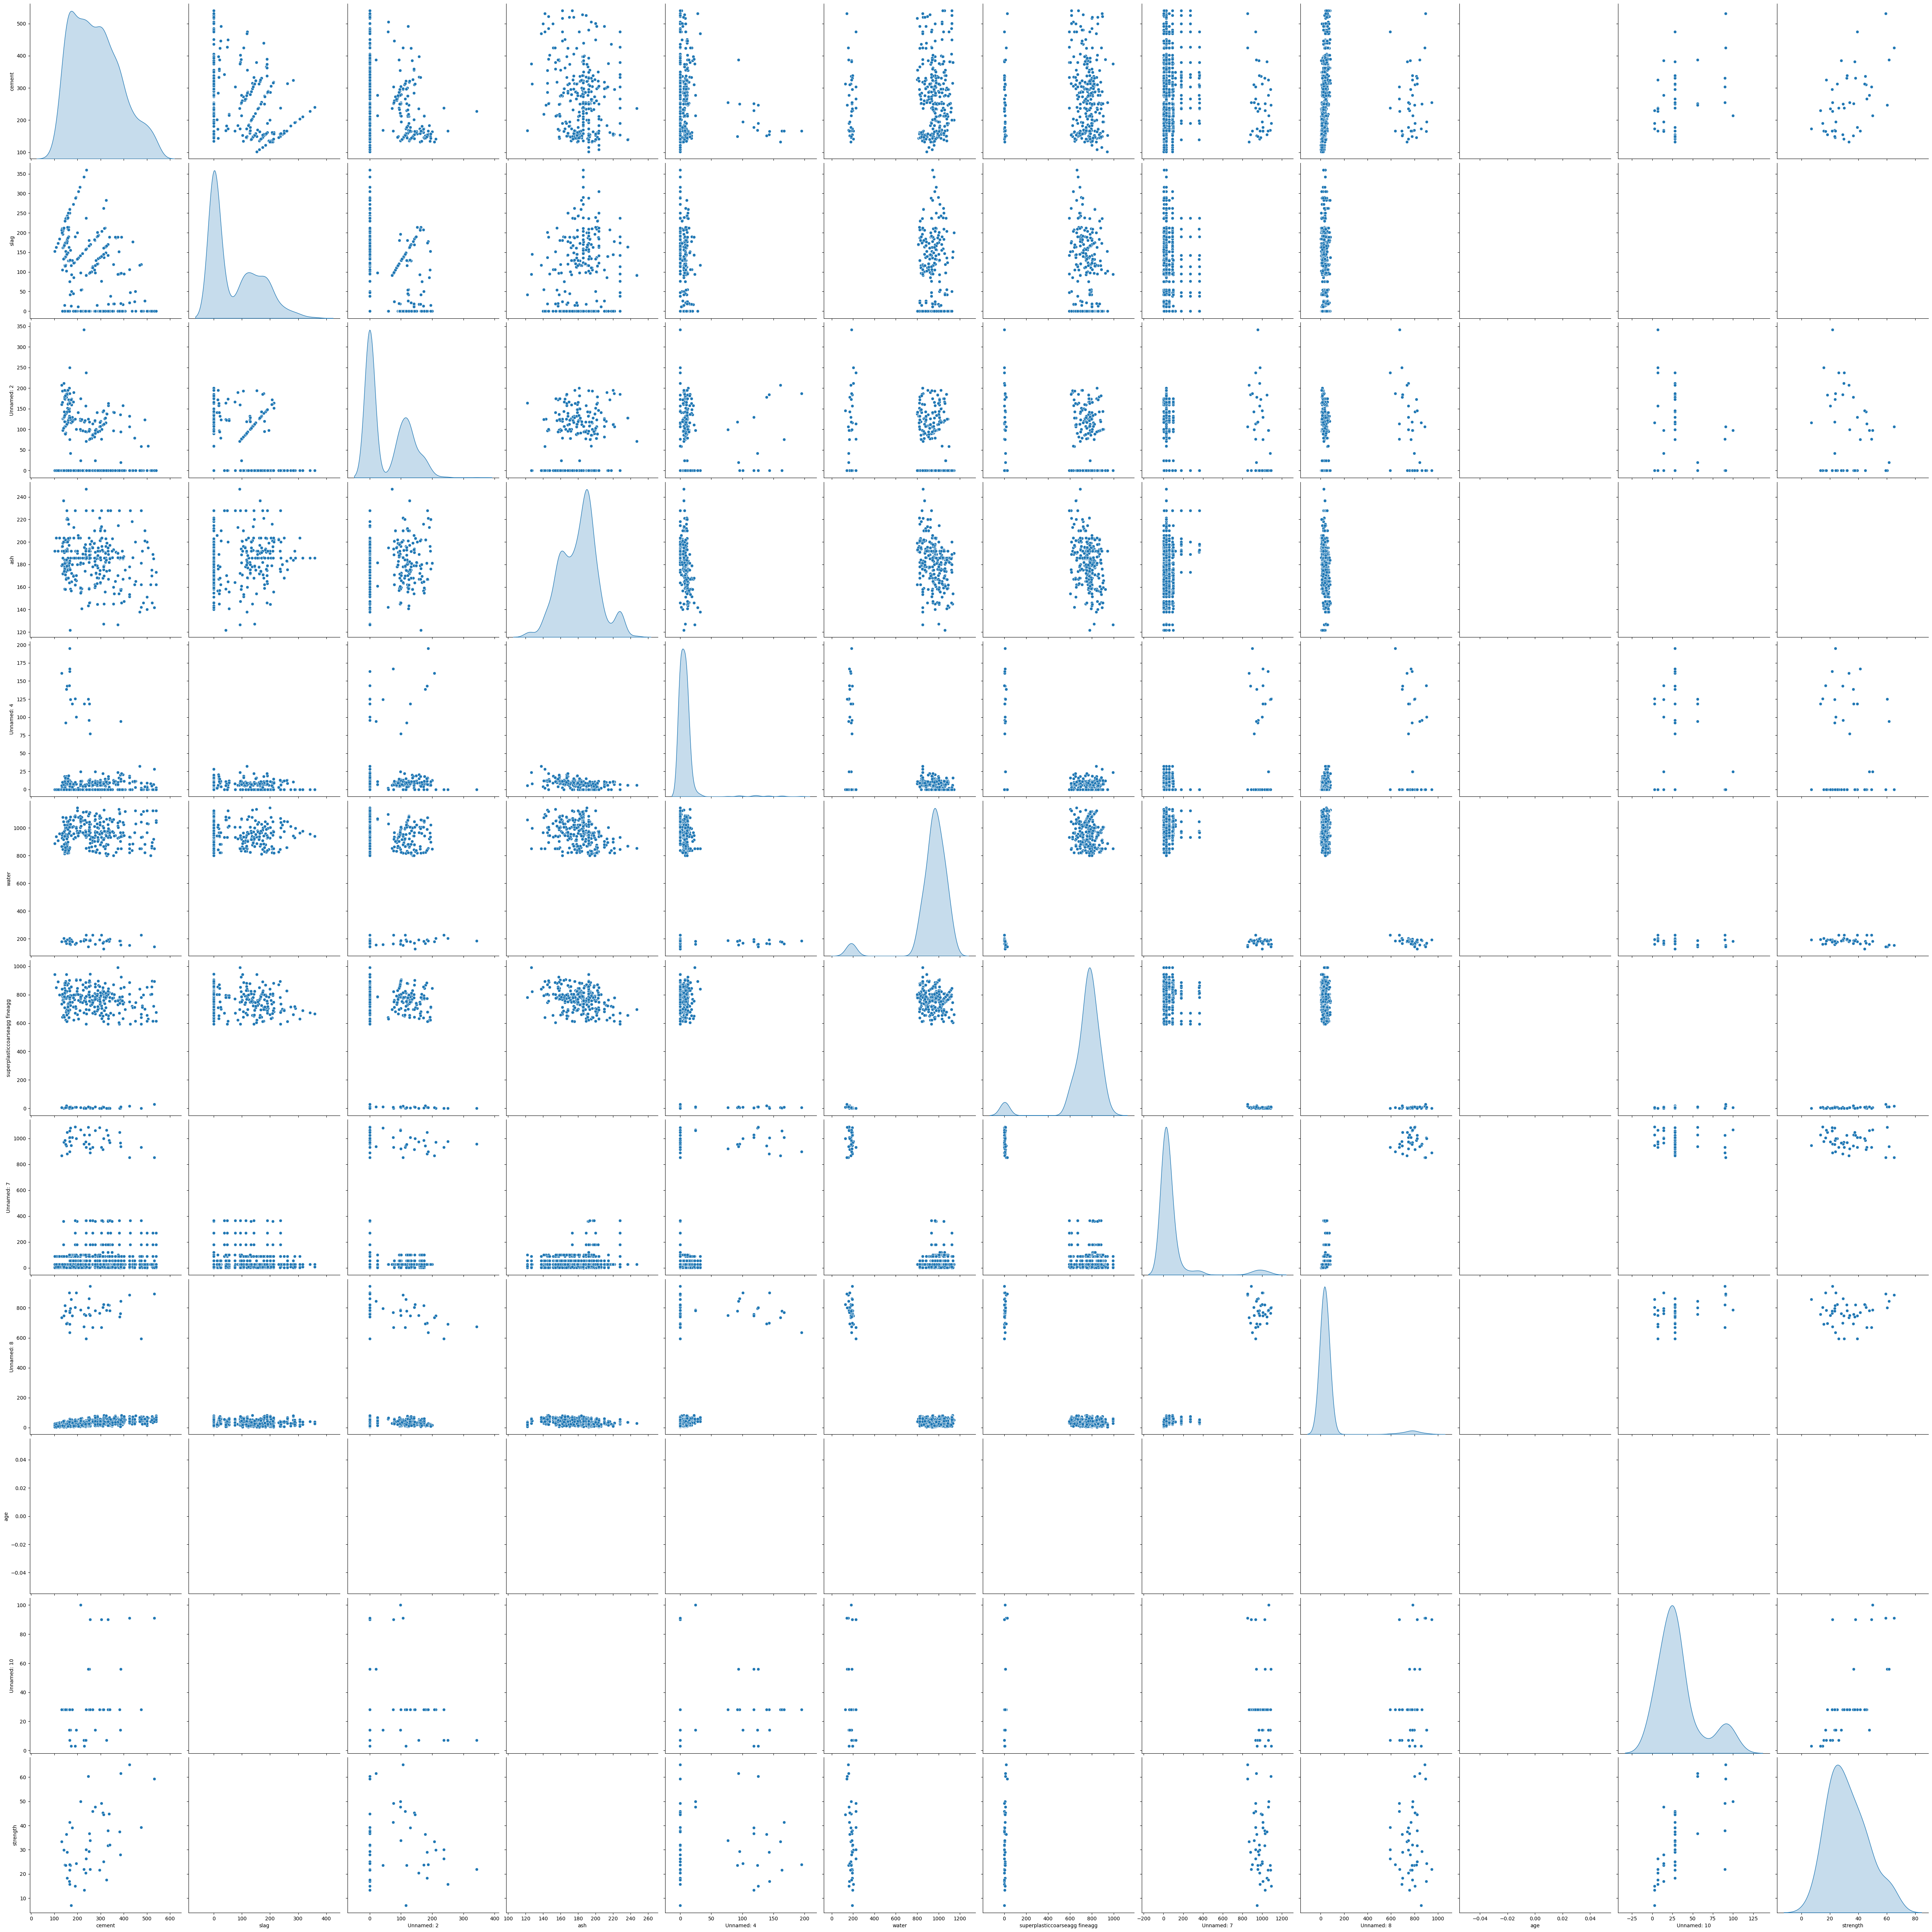

In [43]:
sns.pairplot(data, palette="Set1", diag_kind="kde", height=4.5)

<Axes: >

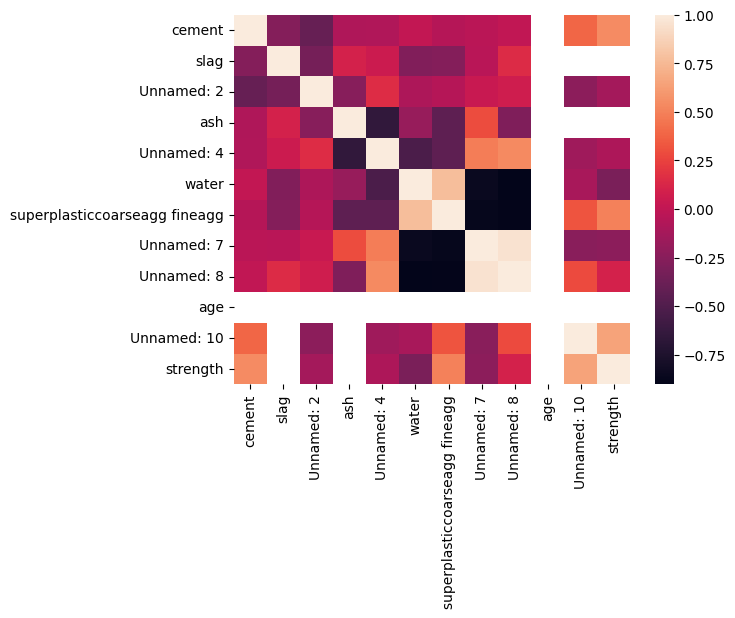

In [44]:
#To find the correlation between the continous variables
correlation=data.corr()
correlation.style.background_gradient(cmap='coolwarm')
sns.heatmap(correlation)

In [50]:
# Dropping outliers
for x in data.columns:
    indexNames_larger = data[ data[x]>3].index
    indexNames_lesser = data[ data[x]<-3].index
    # Delete these row indexes from dataFrame
    data.drop(indexNames_larger , inplace=True)
    data.drop(indexNames_lesser , inplace=True)
data.head()

,cement,slag,Unnamed: 2,ash,Unnamed: 4,water,superplasticcoarseagg fineagg,Unnamed: 7,Unnamed: 8,age,Unnamed: 10,strength


In [52]:
# Shape after removing outliers
data.shape


(0, 12)

In [53]:
# creating a copy of the data to perform featuring engineering
copied_data=data.copy()


copied_data.insert(copied_data.shape[-1]-1,'cement-water-ratio', copied_data['cement']/copied_data['water'])


copied_data.insert(copied_data.shape[-1]-1,'water-cement ratio_with_slag_ash',copied_data['water']/(copied_data['cement'] + copied_data['ash']+ copied_data['slag']))
copied_data.drop([ 'ash','water','cement','slag'], axis=1, inplace=True)


copied_data.head()

,Unnamed: 2,Unnamed: 4,superplasticcoarseagg fineagg,Unnamed: 7,Unnamed: 8,age,Unnamed: 10,cement-water-ratio,water-cement ratio_with_slag_ash,strength


In [54]:
copied_data.dtypes

Unnamed: 2                          float64
Unnamed: 4                          float64
superplasticcoarseagg fineagg       float64
Unnamed: 7                          float64
Unnamed: 8                          float64
age                                 float64
Unnamed: 10                         float64
cement-water-ratio                  float64
water-cement ratio_with_slag_ash    float64
strength                            float64
dtype: object